In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [7]:
df = pd.read_csv('../../data/oil and gas.csv')
naturalGas = df[df['Symbol'] == 'Natural Gas']

x = naturalGas[['Close']].values
y = naturalGas[['Date']].values

<AxesSubplot:xlabel='Volume', ylabel='Close'>

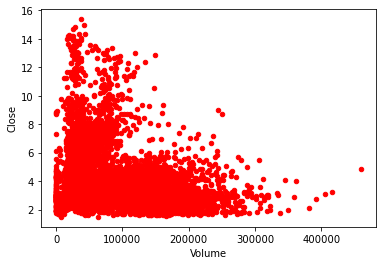

In [8]:
naturalGas.plot(kind='scatter', x = 'Volume', y = 'Close', color='red')